In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset_train=pd.read_csv("Microsoft.csv")
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,243.080002,245.750000,237.399994,239.580002,237.474335,25740000
1,2023-01-04,232.279999,232.869995,225.960007,229.100006,227.086456,50623400
2,2023-01-05,227.199997,227.550003,221.759995,222.309998,220.356125,39585600
3,2023-01-06,223.000000,225.759995,219.350006,224.929993,222.953079,43613600
4,2023-01-09,226.449997,231.240005,226.410004,227.119995,225.123840,27369800


In [3]:
training_set = dataset_train.iloc[:,1:2].values
print('shape is ={}'.format(training_set.shape))
print(training_set[0:5])

shape is =(251, 1)
[[243.080002]
 [232.279999]
 [227.199997]
 [223.      ]
 [226.449997]]


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_training_set = scaler.fit_transform(training_set)
scaled_training_set

array([[-1.72550301e+00],
       [-1.98848737e+00],
       [-2.11218743e+00],
       [-2.21445902e+00],
       [-2.13045023e+00],
       [-2.09855126e+00],
       [-2.01259440e+00],
       [-1.91592328e+00],
       [-1.87355347e+00],
       [-1.84993356e+00],
       [-1.76227199e+00],
       [-1.95196177e+00],
       [-1.92566329e+00],
       [-1.77371670e+00],
       [-1.73962629e+00],
       [-1.93491657e+00],
       [-1.71162348e+00],
       [-1.58159209e+00],
       [-1.69068211e+00],
       [-1.71649348e+00],
       [-1.60569911e+00],
       [-1.34222765e+00],
       [-1.32469531e+00],
       [-1.37583131e+00],
       [-1.30058866e+00],
       [-9.92068821e-01],
       [-9.77459167e-01],
       [-1.27623827e+00],
       [-1.12745695e+00],
       [-1.00497451e+00],
       [-1.11089888e+00],
       [-1.21560602e+00],
       [-1.32834772e+00],
       [-1.44790863e+00],
       [-1.45740529e+00],
       [-1.42161016e+00],
       [-1.55797216e+00],
       [-1.49709617e+00],
       [-1.5

In [5]:
X_train = []
Y_train = []
for i in range(50,250):
    X_train.append(scaled_training_set[i-50:i, 0])
    Y_train.append(scaled_training_set[i, 0])
X_train = np.array(X_train)
Y_train = np.array(Y_train)
print(X_train.shape)
print(Y_train.shape)

(200, 50)
(200,)


In [6]:
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(200, 50, 1)

In [7]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [8]:
regressor = Sequential()
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.3))
regressor.add(Dense(units = 1))

In [9]:
from keras.optimizers import RMSprop
regressor.compile(optimizer=RMSprop(), loss='mean_squared_error')
regressor.fit(X_train, Y_train, epochs = 200, batch_size = 16)

Epoch 1/200

13/13 [==============================] - 5s 49ms/step - loss: 0.2313
Epoch 2/200
13/13 [==============================] - 1s 51ms/step - loss: 0.1095
Epoch 3/200
13/13 [==============================] - 1s 53ms/step - loss: 0.1110
Epoch 4/200
13/13 [==============================] - 1s 52ms/step - loss: 0.0894
Epoch 5/200
13/13 [==============================] - 1s 46ms/step - loss: 0.0978
Epoch 6/200
13/13 [==============================] - 1s 48ms/step - loss: 0.0958
Epoch 7/200
13/13 [==============================] - 1s 45ms/step - loss: 0.0688
Epoch 8/200
13/13 [==============================] - 1s 45ms/step - loss: 0.0727
Epoch 9/200
13/13 [==============================] - 1s 45ms/step - loss: 0.0985
Epoch 10/200
13/13 [==============================] - 1s 45ms/step - loss: 0.0700
Epoch 11/200
13/13 [==============================] - 1s 45ms/step - loss: 0.0582
Epoch 12/200
13/13 [==============================] - 1s 45ms/step - loss: 0.0725
Epoch 13/200
13/13 [====

13/13 [==============================] - 1s 46ms/step - loss: 0.0274
Epoch 99/200
13/13 [==============================] - 1s 46ms/step - loss: 0.0272
Epoch 100/200
13/13 [==============================] - 1s 47ms/step - loss: 0.0215
Epoch 101/200
13/13 [==============================] - 1s 46ms/step - loss: 0.0277
Epoch 102/200
13/13 [==============================] - 1s 46ms/step - loss: 0.0305
Epoch 103/200
13/13 [==============================] - 1s 46ms/step - loss: 0.0248
Epoch 104/200
13/13 [==============================] - 1s 46ms/step - loss: 0.0255
Epoch 105/200
13/13 [==============================] - 1s 48ms/step - loss: 0.0248
Epoch 106/200
13/13 [==============================] - 1s 48ms/step - loss: 0.0268
Epoch 107/200
13/13 [==============================] - 1s 49ms/step - loss: 0.0330
Epoch 108/200
13/13 [==============================] - 1s 48ms/step - loss: 0.0288
Epoch 109/200
13/13 [==============================] - 1s 48ms/step - loss: 0.0242
Epoch 110/200
13/13

13/13 [==============================] - 1s 45ms/step - loss: 0.0208
Epoch 197/200
13/13 [==============================] - 1s 45ms/step - loss: 0.0225
Epoch 198/200
13/13 [==============================] - 1s 45ms/step - loss: 0.0222
Epoch 199/200
13/13 [==============================] - 1s 45ms/step - loss: 0.0192
Epoch 200/200
13/13 [==============================] - 1s 48ms/step - loss: 0.0224


In [10]:
dataset_test = pd.read_csv("Microsoft.csv")
predicted_stock_price = dataset_test.iloc[:,1:2].values

In [11]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test)-60:].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)
X_test = []
for i in range(50, 70):
    X_test.append(inputs[i-50:i, 0])
X_test = np.array(X_test)
Y_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [12]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 1s/step


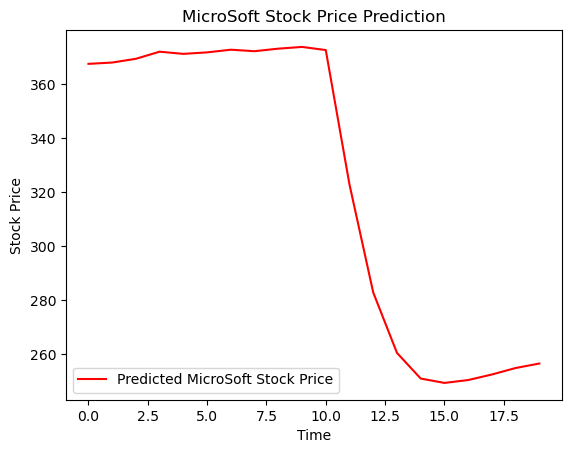

In [13]:
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted MicroSoft Stock Price')
plt.title('MicroSoft Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()